## Plate 2

In [1]:
import itertools
import pathlib
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import umap

%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

sys.path.append("..")
from utils.utils import df_stats, plot_features_all_cluster

/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/lippincm/miniconda3/envs/Interstellar/lib/pyth

/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [2]:
celltype = "SHSY5Y"

In [3]:
# Parameters
celltype = "SHSY5Y"

In [4]:
# Set path to parquet file
path = pathlib.Path(f"../data/{celltype}_preprocessed_sc_norm.parquet")
# Read in parquet file
df1 = pq.read_table(path).to_pandas()
# subset data frame to 1000 samples too much data results in poor clustering
df = df1.sample(n=1000)
# save memory by deleting df1
del df1

In [5]:
# Code snippet for metadata extraction by Jenna Tomkinson
df_metadata = list(df.columns[df.columns.str.startswith("Metadata")])

# define which columns are data and which are descriptive
df_descriptive = df[df_metadata]
df_values = df.drop(columns=df_metadata)

In [6]:
df_values = df_values.drop(
    columns=[
        "oneb_Metadata_Treatment_Dose_Inhibitor_Dose",
        "twob_Metadata_Treatment_Dose_Inhibitor_Dose",
        "threeb_Metadata_Treatment_Dose_Inhibitor_Dose",
        "fourb_Metadata_Treatment_Dose_Inhibitor_Dose",
    ]
)

In [7]:
# set umap parameters
umap_params = umap.UMAP(
    n_components=2,
    spread=1.1,
    init="random",
    random_state=0,
)

In [8]:
# fit and transform data for umap
proj_2d = umap_params.fit_transform(df_values)

# add umap coordinates to dataframe of metadata and raw data
df_values["umap_1"] = proj_2d[:, 0]
df_values["umap_2"] = proj_2d[:, 1]

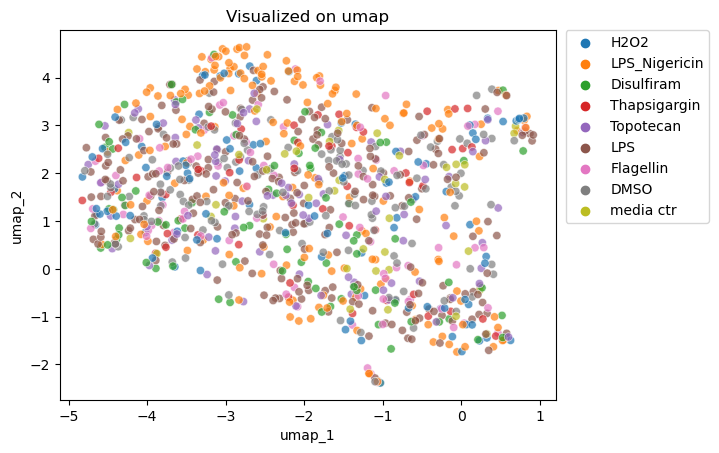

In [9]:
df_values["Treatment"] = df_descriptive["Metadata_Treatment"]
# Figure Showing tSNE of Clusters vs Treatment

sns.scatterplot(
    data=df_values,
    x="umap_1",
    y="umap_2",
    hue="Treatment",
    legend="full",
    alpha=0.7,
)
plt.title("Visualized on umap")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

# if path does not exist create it

plt.savefig(f"Figures/umap_plate2/{celltype}_umap.png", bbox_inches="tight")